libs and defs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

# Load the S-parameter file
bjt = rf.Network('fim.s2p', )

# Define a function to calculate the square of the absolute value
def sqabs(x): return np.square(np.absolute(x))~

# Filter for 4 GHz
freq_idx = np.where(np.isclose(bjt.f, 4e9, atol=1e6))[0][0]
freq_point = bjt[freq_idx]



Stability

MAG at 4 GHz: 18.120868089455257


C:\Users\sofia\AppData\Local\Temp\ipykernel_27148\1414893658.py:13: RuntimeWarning: invalid value encountered in sqrt
  MAG = np.abs(bjt.s12.s/bjt.s21.s) * (k-np.sqrt(np.square(k)-1))


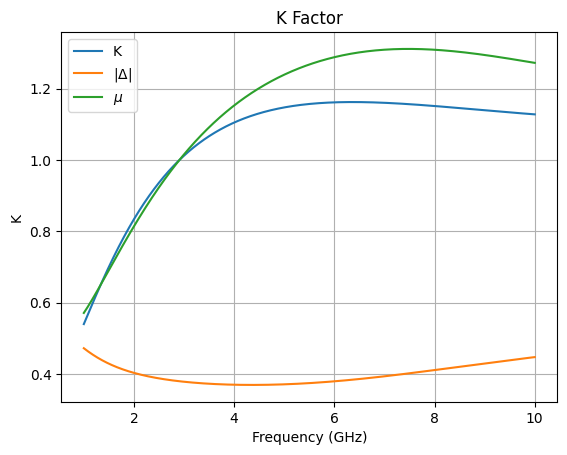

In [7]:
# delta is the determinant of the S-parameter matrix
delta = bjt.s11.s * bjt.s22.s - bjt.s12.s * bjt.s21.s

# k calculation
k = (1 - sqabs(bjt.s11.s) - sqabs(bjt.s22.s) + sqabs(delta)) / \
    (2 * np.abs(bjt.s12.s * bjt.s21.s))

# mu calculation
mu = (1 - sqabs(bjt.s11.s)) / (np.abs(bjt.s22.s -
                                      (delta*np.conj(bjt.s11.s)))+np.abs(bjt.s21.s*bjt.s12.s))

# Maximum available gain (MAG) calculation
MAG = np.abs(bjt.s12.s/bjt.s21.s) * (k-np.sqrt(np.square(k)-1))


k = np.squeeze(k)  # Remove any singleton dimensions
delta = np.squeeze(delta)  # Remove any singleton dimensions
mu = np.squeeze(mu)  # Remove any singleton dimensions
MAG = np.squeeze(MAG)  # Remove any singleton dimensions

# Print MAG at 4 Ghz
val = MAG[np.where(np.isclose(bjt.f, 4e9, atol=1e6))]
print('MAG at 4 GHz:', sum(val)/len(val))

# Plotting k values
plt.figure()
plt.plot(bjt.f/1e9, k)
plt.plot(bjt.f/1e9, np.abs(delta))
plt.plot(bjt.f/1e9, mu)
#plt.plot(bjt.f/1e9, MAG)
# add line in 4 Ghz
#plt.axvline(x=4, color='gray', linestyle='--')
plt.title('K Factor')
plt.xlabel('Frequency (GHz)')
plt.ylabel('K')
plt.grid()
plt.legend(['K', '|$\\Delta$|', '$\\mu$', 'MAG'])
plt.show()


In [8]:
# Calcular B1, B2, C1 e C2
print("Frequency (GHz):", bjt.f[freq_idx] / 1e9)
delta4GHz = delta[freq_idx]
print('delta4GHz:', delta4GHz)

# S11 and S22 for 4 GHz
s11 = freq_point.s11.s[0, 0]  # Extrair o valor numérico de S11
s22 = freq_point.s22.s[0, 0]  # Extrair o valor numérico de S22
print('S11:', s11)
print('S22:', s22)
print('|s11|: ', np.abs(s11))
print('|s22|: ', np.abs(s22))

B1 = 1 + sqabs(s11) - sqabs(s22) - sqabs(delta4GHz)
print('B1:', B1)
B2 = 1 + sqabs(s22) - sqabs(s11) - sqabs(delta4GHz)
print('B2:', B2)
C1 = s11 - (delta4GHz * np.conj(s22))
print('C1:', C1)
C2 = s22 - (delta4GHz * np.conj(s11))
print('C2:', C2)

# Calcular ros (ρs) e rol (ρL)
ros = (B1 - np.sqrt(np.square(B1) - 4 * sqabs(C1))) / (2 * C1)
rol = (B2 - np.sqrt(np.square(B2) - 4 * sqabs(C2))) / (2 * C2)
print("ros (ρs):", ros)
print("rol (ρL):", rol)

zs = (1 + ros) / (1 - ros)
zl = (1 + rol) / (1 - rol)
print("zs:", zs)
print("zl:", zl)

NameError: name 'freq_idx' is not defined